In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

## Download the dataset

In [2]:
df = pd.read_csv('data/CETUC_Features_data.csv')
df.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
0,F000-0000.wav,20,375.222946,0.937955,0.276963,292.5,260.000000,198.858951,29.458918,805.0,260.00,450.00,190.00,0
1,F000-0001.wav,22,421.601378,2.242961,5.486341,315.0,30.230326,302.954316,30.230326,1525.0,251.25,466.25,215.00,0
2,F000-0002.wav,24,388.874388,0.493525,-0.163376,335.0,260.000000,238.496988,0.000000,930.0,260.00,487.50,227.50,0
3,F000-0003.wav,32,399.218750,0.648174,-0.400284,300.0,450.000000,246.500854,0.000000,875.0,250.00,466.25,216.25,0
4,F000-0004.wav,24,360.575072,1.045743,0.312030,292.5,210.000000,229.369368,0.000000,855.0,246.25,395.00,148.75,0


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes.

In [3]:
mydata_train, mydata_test = train_test_split(df, random_state=0, test_size=0.2)

print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the training data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 40820
Masculine voices in the training data: 39978
Feminine voices in the training data: 10178
Masculine voices in the training data: 10022


In [4]:
mydata_train.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
56515,M005-0517.wav,12,418.384679,-0.620207,-0.409610,447.5,15.0,217.048380,15.0,750.0,333.75,595.00,261.25,1
43787,F044-0790.wav,23,307.391304,0.870760,-0.089631,270.0,0.0,270.297218,0.0,940.0,97.50,400.00,302.50,0
69075,M018-0077.wav,34,83.235294,1.390450,1.249061,85.0,0.0,93.272863,0.0,335.0,11.25,108.75,97.50,1
31733,F032-0736.wav,26,37.500000,2.451680,4.142101,15.0,15.0,64.543515,0.0,240.0,15.00,15.00,0.00,0
83141,M032-0143.wav,30,316.756054,4.817123,22.326050,150.0,150.0,634.003232,70.0,3645.0,150.00,180.00,30.00,1


In [5]:
data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_train = mydata_train[['Gender']].copy().values.ravel()
data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_test = mydata_test[['Gender']].copy().values.ravel()

In [6]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(data_x_test), columns=data_x_test.columns)

In [7]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.837

Random Forests
Accuracy on training set: 0.986
Accuracy on test set: 0.875

Gradient Boosting
Accuracy on training set: 0.863
Accuracy on test set: 0.859

Support Vector Machine
Accuracy on training set: 0.848
Accuracy on test set: 0.849

Multilayer Perceptron
Accuracy on training set: 0.880
Accuracy on test set: 0.875
d:\dev\Speaker-Gender-Recognition\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

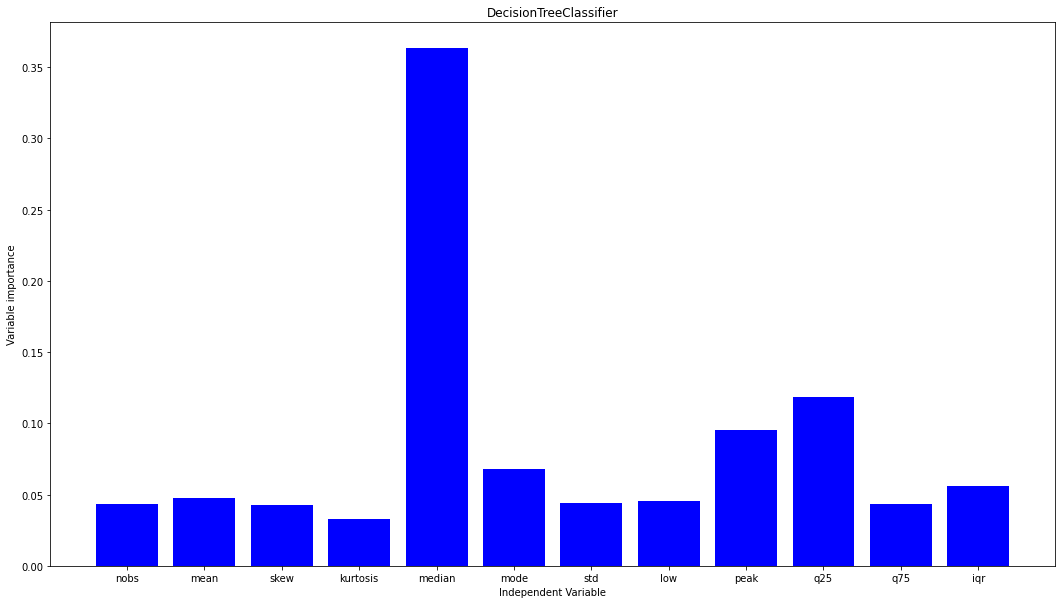

In [24]:
plot_feature_importances_mydata(tree,'blue')

In [63]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_split=0.2, epochs=100, verbose=2)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)

print('\nTest accuracy:', test_acc)

Epoch 1/100
2020/2020 - 2s - loss: 0.5507 - accuracy: 0.7433 - val_loss: 0.4520 - val_accuracy: 0.7848
Epoch 2/100
2020/2020 - 2s - loss: 0.4301 - accuracy: 0.7973 - val_loss: 0.4056 - val_accuracy: 0.8110
Epoch 3/100
2020/2020 - 2s - loss: 0.3971 - accuracy: 0.8159 - val_loss: 0.3895 - val_accuracy: 0.8222
Epoch 4/100
2020/2020 - 1s - loss: 0.3821 - accuracy: 0.8247 - val_loss: 0.3779 - val_accuracy: 0.8261
Epoch 5/100
2020/2020 - 1s - loss: 0.3726 - accuracy: 0.8302 - val_loss: 0.3621 - val_accuracy: 0.8351
Epoch 6/100
2020/2020 - 2s - loss: 0.3666 - accuracy: 0.8338 - val_loss: 0.3584 - val_accuracy: 0.8374
Epoch 7/100
2020/2020 - 2s - loss: 0.3615 - accuracy: 0.8363 - val_loss: 0.3558 - val_accuracy: 0.8399
Epoch 8/100
2020/2020 - 1s - loss: 0.3576 - accuracy: 0.8383 - val_loss: 0.3536 - val_accuracy: 0.8400
Epoch 9/100
2020/2020 - 2s - loss: 0.3545 - accuracy: 0.8406 - val_loss: 0.3492 - val_accuracy: 0.8435
Epoch 10/100
2020/2020 - 2s - loss: 0.3512 - accuracy: 0.8409 - val_loss:

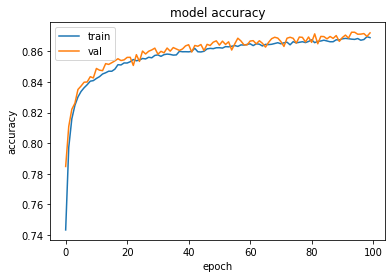

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

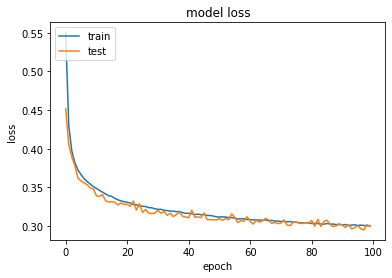

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()